In [17]:
import matplotlib.pyplot as plt
from cv2 import cv2
import numpy as np

KSIZE = 31


class GaborExtractor(object):
    def __init__(self):
        self.kernels = GaborExtractor.gabor_kernel()

    @staticmethod
    def convolution(image, filters):
        result = np.zeros_like(image, dtype=float)
        # Normalize images for better comparison.
        # image = (image - image.mean()) // image.std()
        for kern in filters:
            fimg = cv2.filter2D(image, cv2.CV_64FC3, kern)
            np.maximum(result, fimg, result)
        return result

    @staticmethod
    def gabor_kernel(S, K):
        """Return garbor kernels"""
        filters = np.zeros((S, K, KSIZE, KSIZE))
        # define the range for theta and nu
        mu = 0
        for theta in np.arange(np.pi, 0, -np.pi/S):
            for nu in range(0, K, 1):
                lambd = 4 * K / (nu + 1)
                omega = 2 * np.pi / lambd
                sigma = 3 * np.sqrt(2 * np.log(2)) / omega
                kern = cv2.getGaborKernel(
                    (KSIZE, KSIZE), sigma, theta, lambd, 0.5, 0, ktype=cv2.CV_64F)
                kern /= 4 * np.pi * (sigma**2)
                filters[mu][K - nu - 1] = kern
            mu += 1
        return filters

    def feature_from_image(self, image):

        # initializing the feature vector
        feat = []
        # calculating the local energy for each convolved image
        for j in range(40):
            res = GaborExtractor.convolution(image, self.kernels[j])
            feat.append(np.mean(res))
            feat.append(np.std(res))
        return np.array(feat)


s = 16
k = 5
sample_image = cv2.imread('sample.jpg', 0)
garbor_kernels = GaborExtractor.gabor_kernel(s, k)
U_1 = [0, 1, 2, 3, 4, 5, 14, 15]
U_2 = [7, 8, 9, 10, 11]    

convolution_U_1 = [GaborExtractor.convolution(sample_image, garbor_kernels[index]) for index in U_1]
mean_U_1 = np.mean(np.array(convolution_U_1), axis=0)
convolution_U_2 = [GaborExtractor.convolution(sample_image, garbor_kernels[index]) for index in U_2]
mean_U_2 = np.mean(np.array(convolution_U_2), axis=0)

g_spine = mean_U_1 - mean_U_2
result = np.zeros_like(g_spine, dtype=float)
np.maximum(result, g_spine, result)



array([[3.10417220e-01, 3.02172270e-01, 3.38347457e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.67522919e-01, 3.77885870e-01, 3.50543783e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.05057932e-16, 5.09152182e-16, 5.50124182e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.34916859e-16, 4.74468555e-16, 1.46979529e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.13071445e-16]])

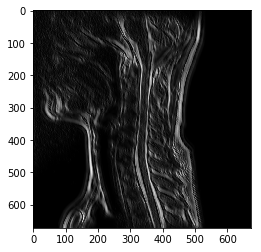

In [19]:
    plt.imshow(mean_U_1, cmap='gray')

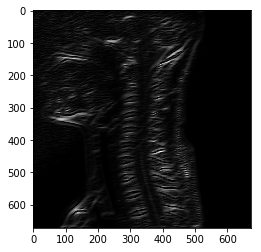

In [11]:
    plt.imshow(convolution_U_2, cmap='gray')

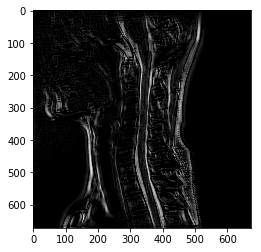

In [12]:
    plt.imshow(result, cmap='gray')